# Q1 Which is a better Estimator

MCMC is one of estimator under Monte Carlo Simulations but it is not certainly the best.<br>
As we move towards a more stationary Distribution, we take more number of iterations to reach convergence.<br>
var($X_t(from MCMC)$) = Var(X) + 2 $\sum_{t=1}^{\infty}cov(X_0,X_t)$<br>
This will be abviously more than that of normal iid sample.<br>
Hence, it is not a better sampler.


# Q2. 

f(y|$\mu$) = N($\mu$,1)<br>
f($\mu$|$\nu$) = $t_{\nu}$<br>
f($\nu$) = Truncated Gamma $(a_0, b_0, (2, \infty ) )$<br><br>
Joint Distribution $(\mu, \nu):f(\mu, \nu | y)$<br>
f($\mu, \nu$ | y) $\propto$ f(y|$\mu$) f($\mu$|$\nu$) f($\nu$)<br>
f($\mu, \nu$ | y) $\propto$ $\nu^{a_0-1}e^{(\frac{-\sum_i(y_i-\mu)^2}{2}-\frac{\nu}{b_0})}(1+\frac{\mu^2}{\nu})^{-\frac{\nu+1}{2}}I(2 < \nu < \infty)$

## MH Algorithm:<br>
1. Set initial value of $\mu, \nu$ from the above data.
2. Draw a random sample from gaussian proposal for k and random proposal for l
3. Calculate MH Ratio $\alpha$
4. Compare the ratio with Uniformly sampled value between 0 and 1. If U < $\alpha$, then update the value with k, l
5. Else update the sample values.

In [11]:
using Random
using QuadGK
using Distributions
using Plots
using StatsPlots
using StatsBase

In [12]:

a = 2
b = 0.1
n = 100
v = rand(Truncated(Gamma(a,b),2,Inf))
u = rand(TDist(v))
Y = rand(Normal(u,1),n)
println("Prior u which is unknown = u = ",u)
println("Prior v which is unknown = v = ",v)

Prior u which is unknown = u = -1.0136548754424999
Prior v which is unknown = v = 2.103523233612167


In [13]:
f(r,t) = exp(-0.5*sum((Y.-r).^2))*((1+(r*r)/t)^(-0.5*(t+1)))*((t)^(a-1))*exp(-1.0*t*b);
u = mean(Y);
v = a/b;
# println(v)
Udata = [u];
Vdat = [v];
count=0;
iterations = 10000;
for t=0:iterations
    k = rand(Normal(u,1))
    l = rand(Uniform(2,v+0.01))
    alpha = min(1,(1.0*f(k,l))/f(u,v))
    U = rand()
    if U<alpha
        u = k
        v = l
        count = count+1
    end
    # println(u, " ", v)
    push!(Udata,u)
    push!(Vdat,v)
end
println("Estimated u = ",u)
println("Estimated v = ",v)
println("Acceptance Ratio:", count/iterations)




Estimated u = -0.7221107564773188
Estimated v = 2.0057054459437516
Acceptance Ratio:0.1246


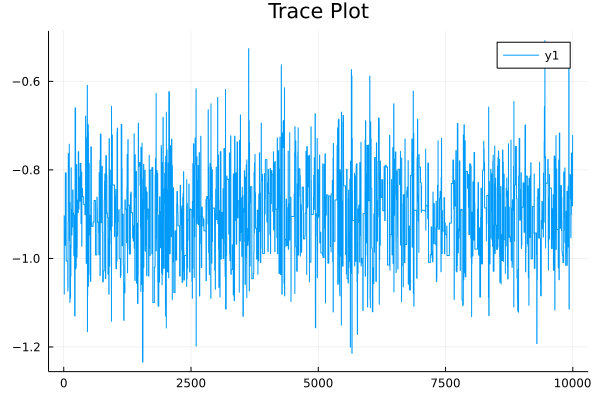

In [14]:
plot(Udata, title="Trace Plot")

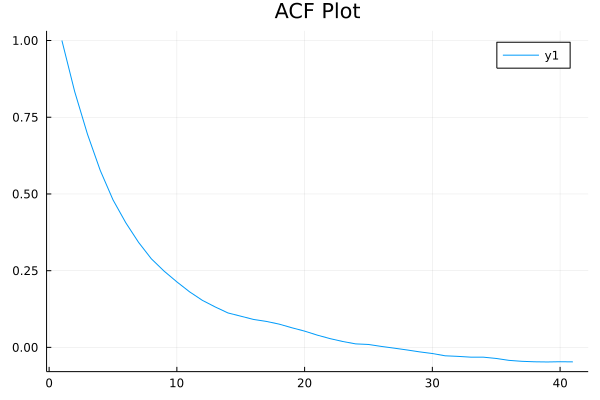

In [15]:
plot(autocor(Udata), title="ACF Plot")

# Q3 

f(y|$\beta, \sigma ^2$) = N($X\beta$,$\sigma ^2I_n$) $\propto (\sigma^2)^{-\frac{n}{2}}e^{\frac{(Y-X\beta)^T(Y-X\beta)}{2\sigma^2}}$
<br>
f($\beta$|$\sigma ^2$) = $N_{p}(\mu, \sigma ^2)$ $\propto (\sigma^2)^{-\frac{p}{2}}e^{\frac{(\beta-\mu)^T(\beta-\mu)}{2\sigma^2}}$<br>
f($\sigma ^2$) = Inverse Gamma $(a,b)$ $\propto (\sigma^2)^{a+1}e^{\frac{-\beta}{\sigma^2}}$<br><br>
Joint Distribution $(\mu, \nu):f(\mu, \nu | y)$<br>
f($\beta, \sigma ^2$ | y) $\propto$ f(y|$\beta, \sigma ^2$) f($\beta$|$\sigma ^2$) f($\sigma ^2$)<br>

In [16]:
using CSV
using Tables
using LinearAlgebra
data = CSV.File("./Boston.csv") |> Tables.matrix;

In [17]:
n = 100
p = 12
a = 2
b = 1
mu = 1

1

In [18]:
X = data[1:100,1:12]
#Scaling the features before performing Linear Regression
X = X./transpose(sum(eachrow(X)))

Y = data[1:100,13]
# #Scaling the MedV before performing Linear Regression
Y = Y./sum(Y);
# # # X
data = data[1:100,1:13]
data = data./transpose(sum(eachrow(data)))

100×13 Matrix{Float64}:
 0.000223084  0.0145337  0.00346394  …  0.010301    0.00462271  0.010758
 0.000963993  0.0        0.0106018      0.010301    0.00848425  0.00968219
 0.000963287  0.0        0.0106018      0.0101954   0.00374087  0.0155543
 0.0011426    0.0        0.003269       0.0102421   0.00272907  0.0149715
 0.00243734   0.0        0.003269       0.010301    0.0049476   0.0162266
 0.00105365   0.0        0.003269    …  0.0102289   0.00483621  0.0128648
 0.00311648   0.0100929  0.0118014      0.0102673   0.0115382   0.0102649
 0.00510235   0.0100929  0.0118014      0.010301    0.0177761   0.0121476
 0.00745639   0.0100929  0.0118014      0.0100345   0.0277827   0.00739612
 0.0060021    0.0100929  0.0118014      0.0100366   0.0158732   0.00847192
 ⋮                                   ⋱  ⋮                       
 0.00138792   0.0        0.00511344     0.0102141   0.00761169  0.00986149
 0.00148358   0.022608   0.0225531      0.010252    0.00757456  0.0102649
 0.00101482   0.0226

In [19]:
using GLM
using DataFrames

In [20]:
data=DataFrame(data,:auto)
fm=@formula(x13~x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12)
linearRegressor=lm(fm,data)
coefficients=coef(linearRegressor)[1:12]

12-element Vector{Float64}:
 -0.016990541778935327
 -0.04388686870531424
  0.0029879928614835465
 -0.050452267880132816
  0.4545545791711741
  2.4008056743086637
 -0.1997965028404978
  0.0017699280955616463
 -0.02483421697028736
 -0.09901025590591746
  0.1294838720380101
  0.11476602046567297

In [7]:
# sigma = rand(InverseGamma(a,b))
# mu = rand(p)
# beta = rand(MvNormal(mu,sigma*Matrix(I,p,p)))
#SIGMA = σ^2
f(BETA, SIGMA) = (abs(SIGMA)^(-n/2-p/2+a+1))*exp.(-sum(transpose(Y.-X*BETA)*(Y.-X*BETA))/(2*SIGMA))*exp.(-sum(transpose(BETA.-mu)*(BETA.-mu))/(2*SIGMA))*exp(-b/SIGMA)

f (generic function with 1 method)

In [8]:
BETA = coefficients
SIGMA = 0.8
ans = [coefficients]
iterations = 10000
count=0
for i=0:iterations
    β = rand(MvNormal(BETA,SIGMA*Matrix(I,p,p)))
    # x = rand(Normal(SIGMA,1))
    alpha = min(1,f(β,SIGMA)/f(BETA,SIGMA))
    # println(alpha)
    U = rand()
    # print(count)
    if U<alpha
        count = count+1
        # print(count)
        BETA = β
        # SIGMA = x
    end
    push!(ans,BETA)
end
println(BETA)
# println(SIGMA)

[0.593300896627859, 0.7758594874826659, 1.1604918735438645, 0.1379523121897176, -0.4109366493775403, 2.846396877087303, 2.0160738611792715, -1.0815539401096679, 1.0174313683986127, -0.487123219596633, 0.3907469379220393, 1.4367330456926641]


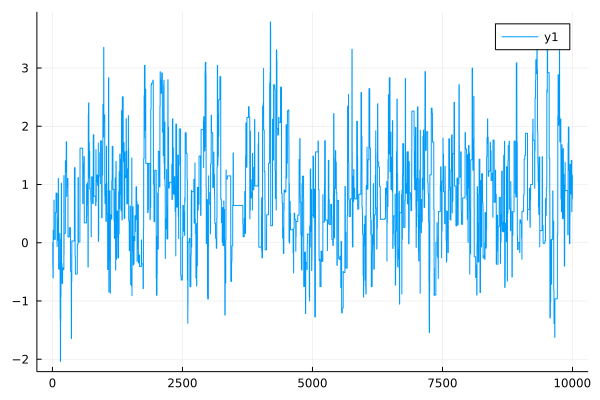

In [58]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []
f10 = []
f11 = []
f12 = []
for i=0:iterations
    push!(f1,ans[i+1][1][1])
    push!(f2,ans[i+1][2][1])
    push!(f3,ans[i+1][3][1])
    push!(f4,ans[i+1][4][1])
    push!(f5,ans[i+1][5][1])
    push!(f6,ans[i+1][6][1])
    push!(f7,ans[i+1][7][1])
    push!(f8,ans[i+1][8][1])
    push!(f9,ans[i+1][9][1])
    push!(f10,ans[i+1][10][1])
    push!(f11,ans[i+1][11][1])
    push!(f12,ans[i+1][12][1])
end

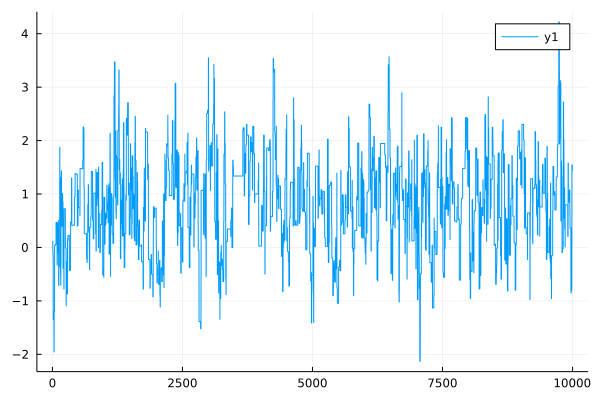

In [63]:
plot(f1)
plot(f2)
plot(f3)
plot(f4)
plot(f5)
plot(f6)
plot(f7)
plot(f8)
plot(f9)
plot(f10)
plot(f11)
plot(f12)

For all the features graph is drawn fine so you can comment other graphs and see.